In [43]:
# Diabetes Analysis & Prediction
# ML ASSIGNMENT

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import os

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_validate

# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [44]:
df = pd.read_csv('diabetes.csv')

In [45]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [46]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [47]:
cat_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness']
num_cols = ['Insulin',  'BMI', 'DiabetesPedigreeFunction', 'Age']

In [48]:
df.shape

(768, 9)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [50]:
df.isnull().any().sum()

0

In [51]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [52]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [53]:
df.duplicated().sum()

0

In [54]:
print(f"shape before removing duplicates: {df.shape}")
df.drop_duplicates(inplace = True)
print(f"shape after removing duplicates: {df.shape}")

shape before removing duplicates: (768, 9)
shape after removing duplicates: (768, 9)


<AxesSubplot:>

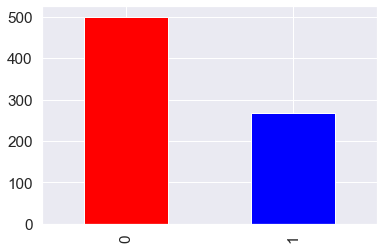

In [55]:
df['Outcome'].value_counts().plot(kind = 'bar', color=['red', 'blue'])

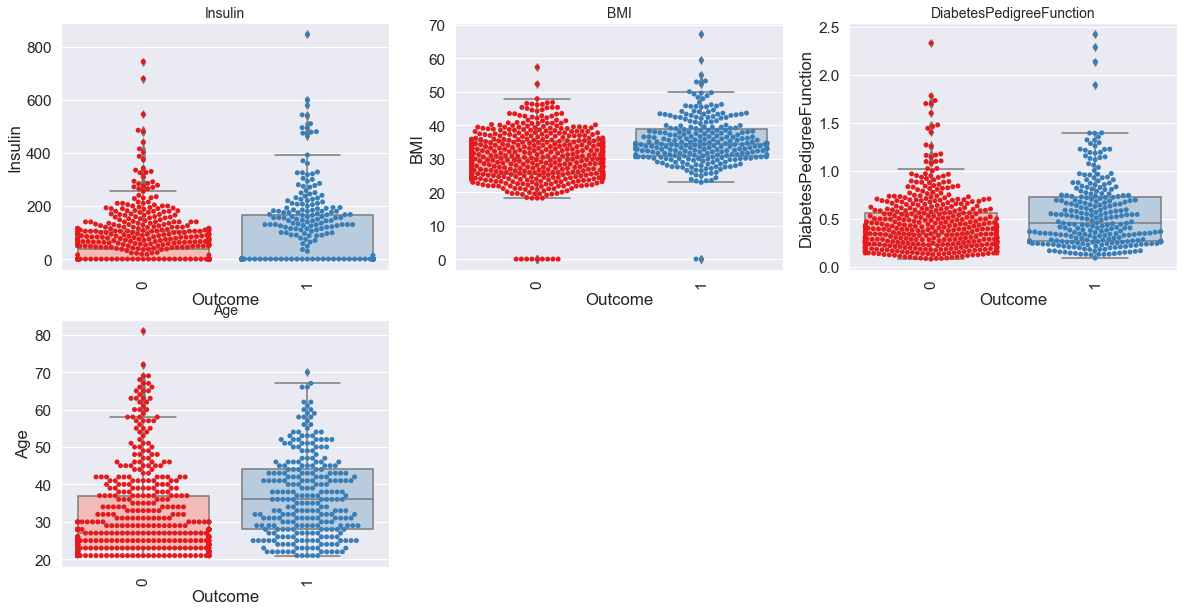

In [56]:
# sns.set_palette("pastel")
plt.figure(figsize=(20,10))
for i, col in enumerate(num_cols):
    plt.subplot(2,3, i+1)
    sns.boxplot(data = df, x = 'Outcome', y = col, palette = 'Pastel1' )
    sns.swarmplot(data = df, x = 'Outcome', y = col, palette = 'Set1')
    plt.xticks(rotation = 90)
    plt.title(f"{col}", fontsize = 14)

In [57]:
plt.figure(figsize=(600,300))
for i, col in enumerate(cat_cols):
    plt.subplot(2,4, i+1)
    sns.countplot(data = df, x = col, palette = 'Set1')
    plt.xticks(rotation = 90)
    plt.title(f"{col}", fontsize = 200)

In [58]:
plt.figure(figsize=(600,300))
for i, col in enumerate(cat_cols):
    plt.subplot(2,4, i+1)
    sns.countplot(data = df, x = col, hue = 'Outcome', palette = 'Set1')
    plt.xticks(rotation = 90)
    plt.title(f"{col}", fontsize = 200)

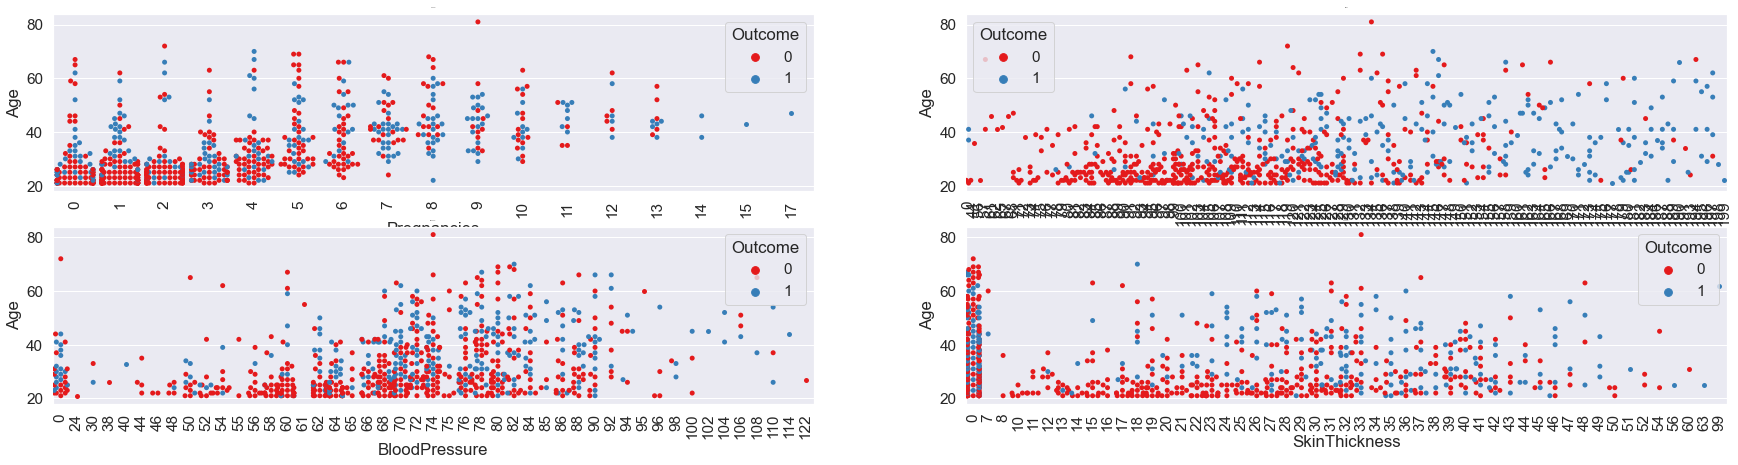

In [90]:
plt.figure(figsize=(30,15))
for i, col in enumerate(cat_cols):
    plt.subplot(4,2, i+1)
    sns.swarmplot(data = df, x = col, y = 'Age', hue = 'Outcome', palette = 'Set1')
    plt.xticks(rotation = 90)
    plt.title(f"{col}", fontsize = 1)

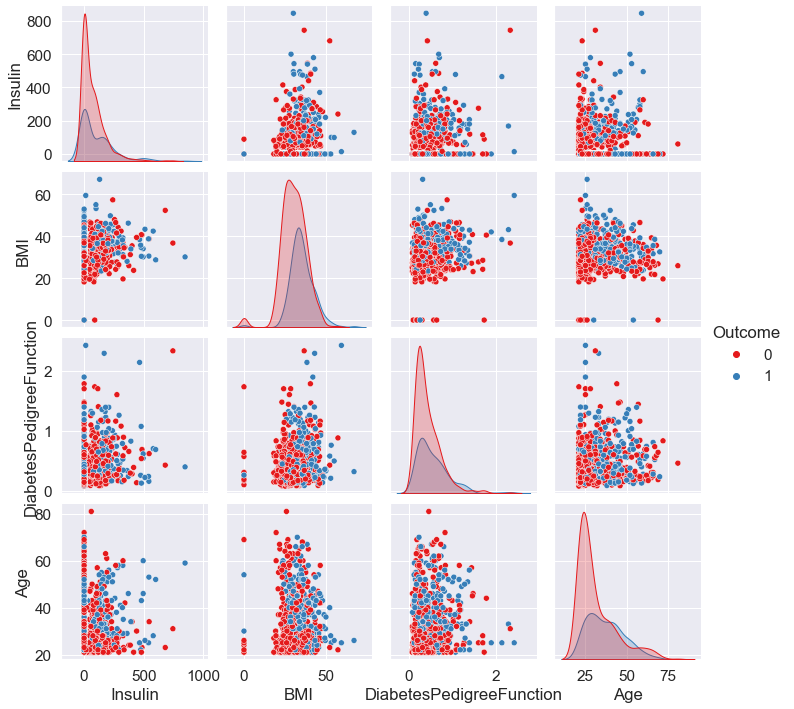

In [60]:
sns.pairplot(df[['Insulin',  'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']],hue = 'Outcome',palette = 'Set1', diag_kind='kde')

<AxesSubplot:>

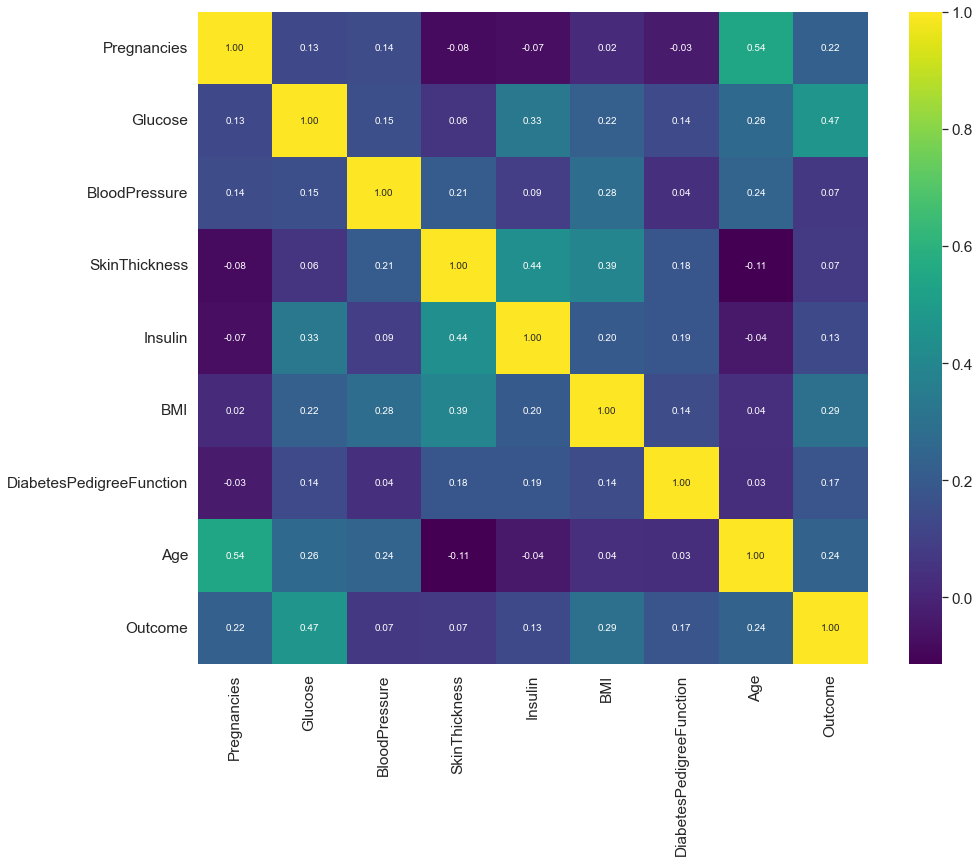

In [61]:
plt.figure(figsize = (15,12))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'viridis', cbar = True)

<AxesSubplot:>

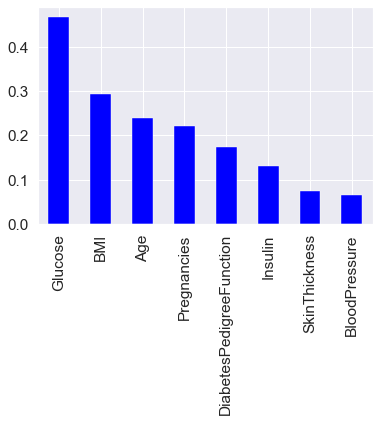

In [62]:
df.corr()['Outcome'].sort_values(ascending = False)[1:].plot(kind = 'bar', lw = .4, color = 'blue')

In [63]:
df[num_cols].head()

Insulin   BMI  DiabetesPedigreeFunction  Age
0        0  33.6                     0.627   50
1        0  26.6                     0.351   31
2        0  23.3                     0.672   32
3       94  28.1                     0.167   21
4      168  43.1                     2.288   33

In [64]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
X_train.shape, X_test.shape

((537, 8), (231, 8))

In [66]:
# standardize only numerical columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [67]:
key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(random_state=9), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]
models = dict(zip(key,value))

In [68]:
cv=KFold(5, shuffle=True, random_state=21)

In [69]:
def model_check(X, y, classifiers, cv):
    
    ''' A function for testing multiple classifiers and return several metrics. '''
    
    model_table = pd.DataFrame()

    row_index = 0
    for cls in classifiers:

        MLA_name = cls.__class__.__name__
        model_table.loc[row_index, 'Model Name'] = MLA_name
        
        cv_results = cross_validate(
            cls,
            X,
            y,
            cv=cv,
            scoring=('accuracy','f1','roc_auc'),
            return_train_score=True,
            n_jobs=-1
        )
        model_table.loc[row_index, 'Train Roc/AUC Mean'] = cv_results['train_roc_auc'].mean()
        model_table.loc[row_index, 'Test Roc/AUC Mean'] = cv_results['test_roc_auc'].mean()
        model_table.loc[row_index, 'Test Roc/AUC Std'] = cv_results['test_roc_auc'].std()
        model_table.loc[row_index, 'Train Accuracy Mean'] = cv_results['train_accuracy'].mean()
        model_table.loc[row_index, 'Test Accuracy Mean'] = cv_results['test_accuracy'].mean()
        model_table.loc[row_index, 'Test Acc Std'] = cv_results['test_accuracy'].std()
        model_table.loc[row_index, 'Train F1 Mean'] = cv_results['train_f1'].mean()
        model_table.loc[row_index, 'Test F1 Mean'] = cv_results['test_f1'].mean()
        model_table.loc[row_index, 'Test F1 Std'] = cv_results['test_f1'].std()
        model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()

        row_index += 1        

    model_table.sort_values(by=['Test F1 Mean'],
                            ascending=False,
                            inplace=True)

    return model_table

In [70]:
raw_models = model_check(X_train, y_train, models.values(), cv)

In [71]:
raw_models

Model Name  Train Roc/AUC Mean  Test Roc/AUC Mean  \
0          LogisticRegression            0.855161           0.845118   
5  GradientBoostingClassifier            0.994924           0.829659   
4      RandomForestClassifier            1.000000           0.839099   
3      DecisionTreeClassifier            1.000000           0.688776   
2                         SVC            0.813964           0.807469   
1        KNeighborsClassifier            0.879708           0.731952   

   Test Roc/AUC Std  Train Accuracy Mean  Test Accuracy Mean  Test Acc Std  \
0          0.038592             0.797481            0.791468      0.031358   
5          0.017783             0.960898            0.772793      0.030604   
4          0.026470             1.000000            0.772776      0.045266   
3          0.023717             1.000000            0.720578      0.023842   
2          0.043659             0.768620            0.765403      0.040338   
1          0.045192             0.809595            0.724368      0.016682   

   Train F1 Mean  Test F1 Mean  Test F1 Std      Time  
0       0.668514      0.647026     0.073560  0.094263  
5       0.939679      0.645543     0.028809  0.193959  
4       1.000000      0.627478     0.080076  0.354463  
3       1.000000      0.581672     0.043566  0.003247  
2       0.575148      0.564514     0.076210  0.023171  
1       0.686508      0.535517     0.039869  0.026494

In [72]:
def f_imp(classifiers, X, y, bins):
    
    ''' A function for displaying feature importances'''
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    axes = axes.flatten()

    for ax, classifier in zip(axes, classifiers):

        try:
            classifier.fit(X, y)
            feature_imp = pd.DataFrame(sorted(
                zip(classifier.feature_importances_, X.columns)),
                                       columns=['Value', 'Feature'])

            sns.barplot(x="Value",
                        y="Feature",
                        data=feature_imp.sort_values(by="Value",
                                                     ascending=False),
                        ax=ax,
                        palette='plasma')
            plt.title('Features')
            plt.tight_layout()
            ax.set(title=f'{classifier.__class__.__name__} Feature Impotances')
            ax.xaxis.set_major_locator(MaxNLocator(nbins=bins))
        except:
            continue
    plt.show()

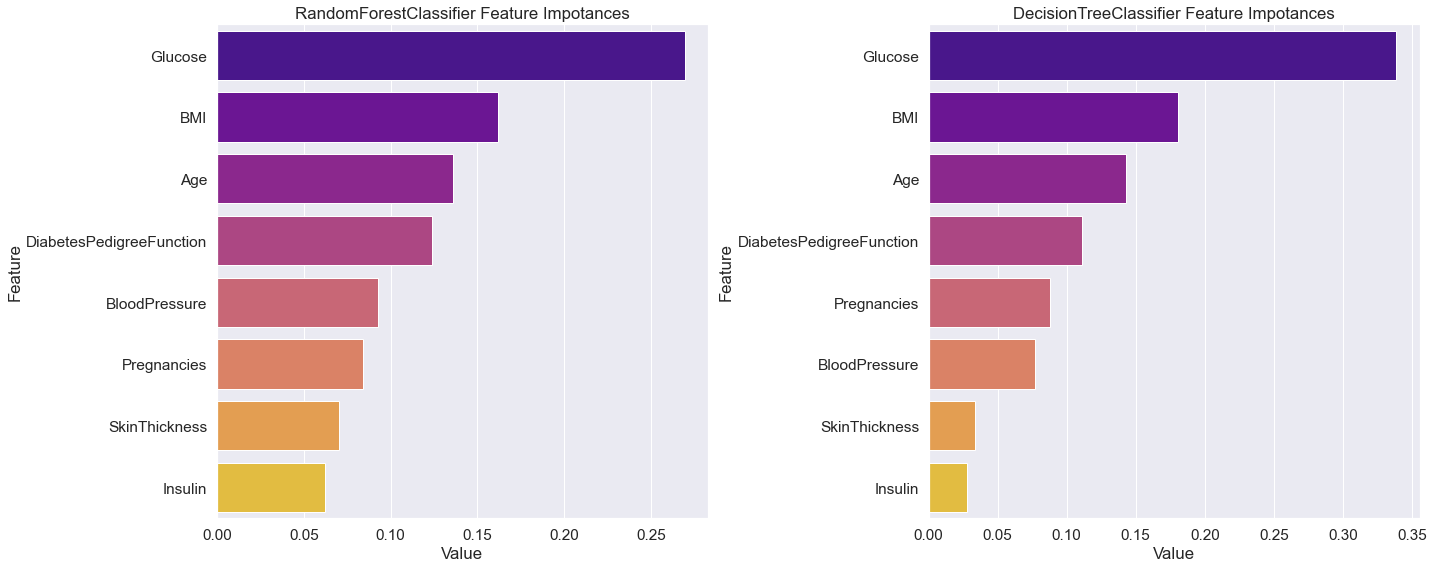

In [73]:
f_imp([RandomForestClassifier(), DecisionTreeClassifier()], X_train, y_train, 6)

In [74]:
raw_models.columns

Index(['Model Name', 'Train Roc/AUC Mean', 'Test Roc/AUC Mean',
       'Test Roc/AUC Std', 'Train Accuracy Mean', 'Test Accuracy Mean',
       'Test Acc Std', 'Train F1 Mean', 'Test F1 Mean', 'Test F1 Std', 'Time'],
      dtype='object')

<AxesSubplot:xlabel='Train Accuracy Mean', ylabel='Model Name'>

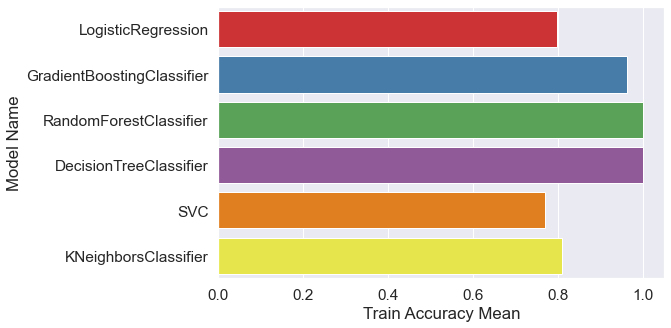

In [75]:
plt.figure(figsize = (8,5))
sns.barplot(data=raw_models, x = 'Train Accuracy Mean', y = 'Model Name', palette = 'Set1')

<AxesSubplot:xlabel='Test Accuracy Mean', ylabel='Model Name'>

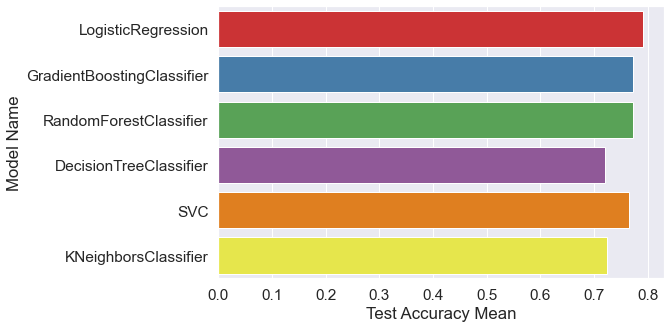

In [76]:
plt.figure(figsize = (8,5))
sns.barplot(data=raw_models, x = 'Test Accuracy Mean', y = 'Model Name', palette = 'Set1')

In [77]:
raw_models.set_index('Model Name', inplace = True)

<AxesSubplot:ylabel='Model Name'>

<Figure size 1296x576 with 0 Axes>

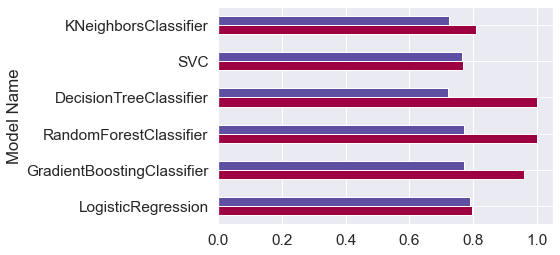

In [78]:
plt.figure(figsize = (18,8))
raw_models[['Train Accuracy Mean','Test Accuracy Mean' ]].plot(kind = 'barh', colormap = cm.get_cmap('Spectral'), legend = False)

In [79]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print(f'Accuracy score: {round(accuracy_score(y_test, pred) * 100, 2)} %')

Accuracy score: 73.59 %


In [80]:
print("train score - " + str(lr.score(X_train, y_train)))
print("test score - " + str(lr.score(X_test, y_test)))

train score - 0.7970204841713222
test score - 0.7359307359307359


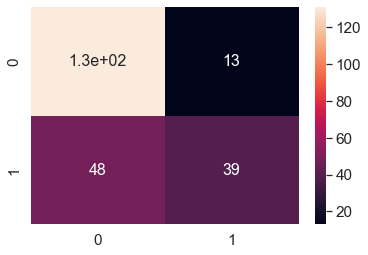

In [81]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lg = confusion_matrix(y_test,pred)
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_lg, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [82]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       144
           1       0.75      0.45      0.56        87

    accuracy                           0.74       231
   macro avg       0.74      0.68      0.69       231
weighted avg       0.74      0.74      0.72       231

